In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
%matplotlib inline


In [5]:
df=pd.read_csv('Reordered_Crop_Recommendation.csv')
df.head()

,Temperature,Nitrogen,Potassium,Phosphorus,Rainfall,Humidity,PH_Value,Crop
0,20.879744,90,43,42,202.935536,82.002744,6.502985,Rice
1,21.770462,85,41,58,226.655537,80.319644,7.038096,Rice
2,23.004459,60,44,55,263.964248,82.320763,7.840207,Rice
3,26.491096,74,40,35,242.864034,80.158363,6.980401,Rice
4,20.130175,78,42,42,262.717340,81.604873,7.628473,Rice


In [6]:
c=df.Crop.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.target
X=df[['Temperature','Nitrogen','Potassium','Phosphorus','Rainfall','Humidity','PH_Value']]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Classification using SVC

In [8]:
from sklearn.svm import SVC

svc_linear = SVC(kernel = 'linear').fit(X_train_scaled, y_train)
print("Linear Kernel Accuracy: ",svc_linear.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'rbf').fit(X_train_scaled, y_train)
print("Rbf Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'poly').fit(X_train_scaled, y_train)
print("Poly Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

Linear Kernel Accuracy:  0.9745454545454545
Rbf Kernel Accuracy:  0.9872727272727273
Poly Kernel Accuracy:  0.9890909090909091


# Classification using Gradiend Boosting 


In [9]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier().fit(X_train, y_train)
print('Gradient Boosting accuracy : {}'.format(grad.score(X_test,y_test)))


Gradient Boosting accuracy : 0.9963636363636363


In [10]:
input_data = {
   'Temperature': [25],
    'Nitrogen':[90],
    'Potassium':[70],
    'Phosphorus':[50],
    'Rainfall':[200],
    'Humidity':[60],
    'PH_Value':[6.5],
}

In [11]:
input_df = pd.DataFrame(input_data)


In [12]:
prediction = grad.predict(input_df)

In [13]:
print(f"Predicted Output: {targets[prediction[0]]}")

Predicted Output: Coffee


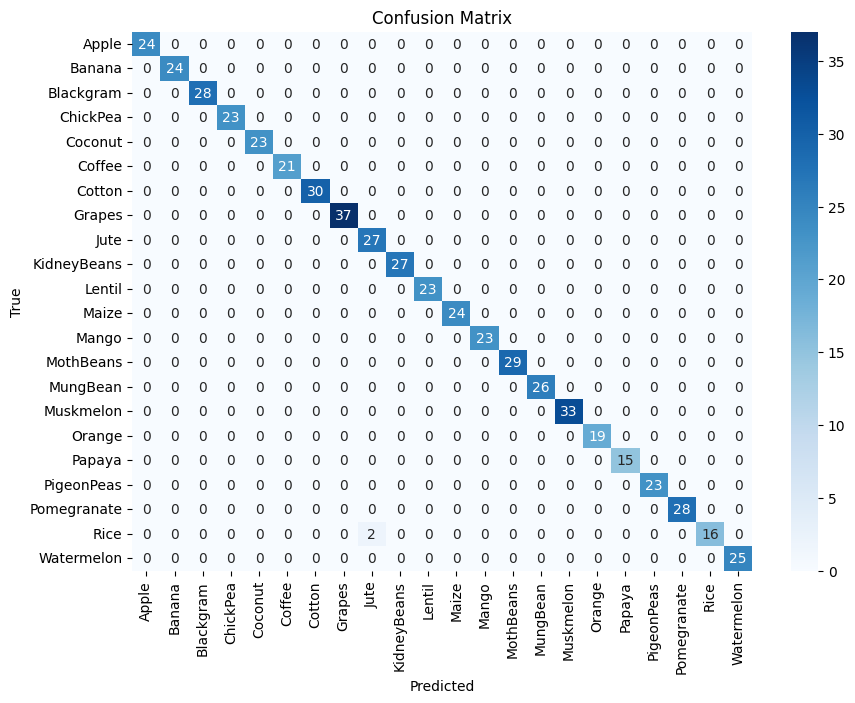

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=targets.values(), yticklabels=targets.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [19]:

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=targets.values()))


Classification Report:
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        24
      Banana       1.00      1.00      1.00        24
   Blackgram       1.00      1.00      1.00        28
    ChickPea       1.00      1.00      1.00        23
     Coconut       1.00      1.00      1.00        23
      Coffee       1.00      1.00      1.00        21
      Cotton       1.00      1.00      1.00        30
      Grapes       1.00      1.00      1.00        37
        Jute       0.93      1.00      0.96        27
 KidneyBeans       1.00      1.00      1.00        27
      Lentil       1.00      1.00      1.00        23
       Maize       1.00      1.00      1.00        24
       Mango       1.00      1.00      1.00        23
   MothBeans       1.00      1.00      1.00        29
    MungBean       1.00      1.00      1.00        26
   Muskmelon       1.00      1.00      1.00        33
      Orange       1.00      1.00      1.00        19
   

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy: {:.4f}".format(accuracy))


Accuracy: 0.9964


In [22]:
from joblib import dump

# Save the model
dump(grad, 'crop_prediction_model.joblib')

['crop_prediction_model.joblib']